In [1]:
# [1] COLLECT ALL GROUND TRUTH DATA
import collections
from plot_overlap_ratios import plot_ratio_success
from algorithm_output_parser import process_algorithm_output
from algorithm_output_parser import toboggan_output_parser
from algorithm_output_parser import catfish_output_parser

from load_all_data import get_all_data


show_flag = False


# [1] get all data
all_path_info, all_toboggan_data = get_all_data( [0,1,2] )
froots = ['human', 'mouse', 'zebra']

Loading human
Loading mouse
Loading zebra
Done with get_all_data



In [2]:
gt_pathset_dict = []
all_catfish_paths = []
all_toboggan_paths = []
all_stats = [collections.defaultdict(list), collections.defaultdict(list), collections.defaultdict(list)]
indices_identical = [collections.defaultdict(list), collections.defaultdict(list), collections.defaultdict(list)]
indices_different = [collections.defaultdict(list), collections.defaultdict(list), collections.defaultdict(list)]
indices_timeout = [collections.defaultdict(list), collections.defaultdict(list), collections.defaultdict(list)]

for which_dataset in [0,1,2]:
    #     # FILTER ALGORITHM OUTPUTS FOR RELEVANT DATA
    froot = froots[which_dataset]
    gt_pathset_dict = all_path_info['groundtruth'][froot].copy()
    all_catfish_paths = all_path_info['catfish'][froot]
    all_toboggan_paths = all_path_info['toboggan'][froot]
    
    non_opt_groundtruth_list = []
    for key, path in gt_pathset_dict.items():
        kpath = all_toboggan_paths[key]
        if len(kpath) != len(path):
            non_opt_groundtruth_list.append(key)
    for badkey in non_opt_groundtruth_list:
        gt_pathset_dict.pop(badkey, None)
            
    
    j = which_dataset
    all_stats[j][0], indices_identical[j][0], indices_different[j][0], indices_timeout[j][0] = process_algorithm_output(gt_pathset_dict, all_catfish_paths)
    all_stats[j][1], indices_identical[j][1], indices_different[j][1], indices_timeout[j][1] = process_algorithm_output(gt_pathset_dict, all_toboggan_paths)
    

Num timeouts = 0
Num timeouts = 0
Num timeouts = 0
Num timeouts = 0
Num timeouts = 0
Num timeouts = 0


In [3]:
# Counting number of timeouts and number of trivials
num_trivials = 0
num_timeouts = 0
num_instances = 0

for which_dataset in [0,1,2]:
    froot = froots[which_dataset]
    this_tobog_data = all_toboggan_data[froot]
    this_num_trivials = 0
    this_num_timeouts = 0
    this_num_instances = 0
    for key, row in this_tobog_data.items():
        this_num_instances += 1
        if row[3] == '0':
            this_num_trivials += 1
        if row[7] == 'None':
            this_num_timeouts += 1
    print("For {}\n\ttimeouts {:10d}\n\ttrivials {:10d}".format(froot, this_num_timeouts, this_num_trivials))
    num_timeouts += this_num_timeouts
    num_trivials += this_num_trivials
    num_instances += this_num_instances

print("Totals\n\ttimeouts {:10d}\n\ttrivials {:10d}\n\ttotal {:10d}".format(num_timeouts, num_trivials, num_instances))
#    

For human
	timeouts       2478
	trivials     639560
For mouse
	timeouts       2487
	trivials     842873
For zebra
	timeouts        178
	trivials    1103493
Totals
	timeouts       5143
	trivials    2585926
	total    4034514


In [4]:
# Check GROUNDTRUTH RECOVERY

alg_names = ['catfish', 'toboggan']
total_num = 0
identical_num = [0, 0]
for j in [0,1,2]:
    froot = froots[j]
    print("For {},".format(froot))
    total_num += len(all_stats[j][0])
    for which_alg in [0,1]:
        alg_name = alg_names[which_alg]
        print("{} percent identical is: {}".format( alg_name, len(indices_identical[j][which_alg])/len(all_stats[j][which_alg])))

        identical_num[which_alg] += len(indices_identical[j][which_alg])
        
for which_alg in [0,1]:
    alg_name = alg_names[which_alg]
    print("TOTALS: {} percent identical is: {}".format( alg_name, identical_num[which_alg]/total_num))


For human,
catfish percent identical is: 0.9690024012224405
toboggan percent identical is: 0.931298463407458
For mouse,
catfish percent identical is: 0.9690272542303694
toboggan percent identical is: 0.9017920735453886
For zebra,
catfish percent identical is: 0.980496784259145
toboggan percent identical is: 0.8973140426296118
TOTALS: catfish percent identical is: 0.97255981960712
TOTALS: toboggan percent identical is: 0.9111843724200748


In [64]:
# combine all datasets
# data1 = numpy.array(stats[:,0])  # size of ground truth pathset
# data2 = numpy.array(stats[inds_identical, 0])  # size of ground truth pathset when algorithm identical

combined_stats = [[],[]]
combined_identicals = [[],[]]
for idx_alg, which_alg in enumerate(alg_names):
    for idx_froot, froot in enumerate(froots):
        print( idx_alg, idx_froot)
        combined_stats[idx_alg].extend( [ int(x) for x in all_stats[idx_froot][idx_alg][:,0] ]  )
        combined_identicals[idx_alg].extend( [int(x) for x in all_stats[idx_froot][idx_alg][indices_identical[idx_froot][idx_alg],0]] )


0 0
0 1
0 2
1 0
1 1
1 2


In [136]:
# density plot GROUDTRUTH RECOVERY

import matplotlib.pyplot as plt
import numpy
figurename = 'size-vs-ratio-identical-'

def plot_ratios(figurename, all_stats, identical_stats, show_flag=True, ylogflag=False):
    
    def get_width(num_datapoints):
        return 0.18*numpy.log10(num_datapoints)
    
    plt.close()
    plt.clf()
    plt.figure(figsize=(4,3))

    alg_names = ['catfish', 'toboggan']
    colors = ['red', 'blue']
    markerset = ['+','o']

    fig, ax1 = plt.subplots()
    
    fig_alg = {}
    max_label = 0

    data_both = {}
    soln_sizes_both = {}
    num_datapoints_both = {}
    widths_both = {}
    for which_alg in range(len(alg_names)):
        print(" {} with # data points {} ".format(alg_names[which_alg], len(all_stats[which_alg])) )

        data1_counter = collections.Counter(numpy.array(all_stats[which_alg]))
        data2_counter = collections.Counter(numpy.array(identical_stats[which_alg]))
        
        data = []
        soln_sizes = []
        num_datapoints = []
        widths = []
        for soln_size, x in data1_counter.items():
            y = data2_counter[soln_size]
            if x != 0:
                data.append(y/x)
                num_datapoints.append(int(x))
                soln_sizes.append(int(soln_size))
                widths.append(get_width(x))
                if y != 0:
                    max_label = max( max_label, int(soln_size) )
        data_both[which_alg] = data
        soln_sizes_both[which_alg] = soln_sizes
        num_datapoints_both[which_alg] = num_datapoints
        widths_both[which_alg] = widths

        #ax1.scatter(soln_sizes, data, color=colors[which_alg], marker=markerset[which_alg],
        #            label=alg_names[which_alg], alpha=0.5)

        
    width = 0.3       # the width of the bars

    which_alg = 0
    ax1.bar([x-width/2 for x in list(soln_sizes) ], data_both[which_alg], width, color=colors[which_alg], alpha=0.5, label=alg_names[which_alg])
    which_alg = 1
    ax1.bar( [x+width/2 for x in list(soln_sizes) ] , data_both[which_alg], width, color=colors[which_alg], alpha=0.5, label=alg_names[which_alg])

    axis_font_size = 16
    legend_font_size = 11
    axis_font = {'fontname':'DejaVu Sans', 'size':'{}'.format(axis_font_size)}
    title_font = {'fontname':'DejaVu Sans', 'size':'17'}
    xtick_font = 14
    ytick_font = 14

    plt.title("ground truth recovery", **title_font)
    plt.xlabel("decomposition size", **axis_font)
    xlims = plt.xlim()
    # Determine xlims
    xlimmin = xlims[0]
    xlimmax = 12
    ax1.set_xlim([xlimmin, xlimmax])
    
    ax1.set_ylim([0,1])
    ax1.set_ylabel("ratio recovered", color='purple', **axis_font)
    ax1.tick_params('y', colors='purple', labelsize=ytick_font)
    ax1.tick_params('x', labelsize=xtick_font)

    # get all ground truth sizes
    soln_sizes = [ (int(soln_size), int(count)) for soln_size, count in \
                  collections.Counter(all_stats[0]).items() if count != 0 ]         
    soln_sizes, num_datapoints = zip(*soln_sizes)

    plt.xticks( range(1, int(max(soln_sizes)+1)) )
    ax2 = ax1.twinx()
    ydata = numpy.array(num_datapoints)
    
    decomp_size_color = 'black'
    #ax2.bar(list(soln_sizes), list(ydata/sum(ydata)), color=decomp_size_color, alpha=0.33)
    ax2.scatter(list(soln_sizes), list(ydata/sum(ydata)), color=decomp_size_color, marker='_', s=650*width)
    ax2.set_ylabel('ratio of instances', color=decomp_size_color, **axis_font)
    ax2.set_xlim([xlimmin, xlimmax])
    
    if ylogflag == True:
        ax2.set_yscale("log")
    ax2.tick_params('y', colors=decomp_size_color, labelsize=ytick_font)
    ax2.set_ylim([0,1])

    ax1.legend(loc='upper right', frameon=False, prop={'size':legend_font_size})#, handles=ax1, labels=alg_names)
    fig.tight_layout()

    if show_flag:
        plt.show()
    else:
        plt.savefig( './figures/' + ''.join([figurename, '.pdf']), format='pdf', dpi=300)
        plt.savefig( './figures/' + ''.join([figurename, '.png']), format='png', dpi=300)
    plt.close()
    print("Done with plot {}".format(figurename))

 catfish with # data points 1442629 
 toboggan with # data points 1442629 


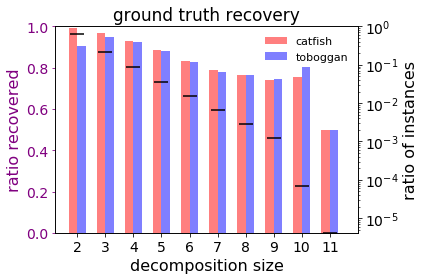

Done with plot all-recovery-stats
 catfish with # data points 1442629 
 toboggan with # data points 1442629 
Done with plot all-recovery-stats


In [138]:
ylogscale = True
plot_ratios('all-recovery-stats', combined_stats, combined_identicals, True, ylogscale)
plot_ratios('all-recovery-stats', combined_stats, combined_identicals, False, ylogscale)

In [7]:
# NOW DO BOXPLOTS ON INSTANCES WHERE ALGORITHM MISSES GROUNDTRUTH

def get_stats(set1, set2):
    identical = False
    if set1 == set2:
        identical = True
    len_intersect = len(set1.intersection(set2))
    jaccard = len_intersect / ( len(set1) + len(set2) - len_intersect )
    if len(set1) == 0:
        recall = 1.0
    else:
        recall = len_intersect / len(set1)

    return recall, jaccard, identical

# all_path_info, all_toboggan_data = get_all_data( [0,1,2] )
# froots = ['human', 'mouse', 'zebra']

data_catfish = {}
data_toboggan = {}
num_nontrivials = []

for froot in froots:
    gt_pathset_dict = all_path_info['groundtruth'][froot]
    toboggan_paths = all_path_info['toboggan'][froot]
    catfish_paths = all_path_info['catfish'][froot]
    
    this_catfish = []
    this_toboggan = []
    this_num_nontrivial = 0

    for key, gt_path in gt_pathset_dict.items():
        gt_size = len(gt_path)
        if gt_size == 1:  # skip trivial instances
            continue
        cat_recall, cat_jaccard, cat_identical = get_stats(gt_path, catfish_paths[key])
        tob_recall, tob_jaccard, tob_identical = get_stats(gt_path, toboggan_paths[key])
        if not cat_identical:
            this_catfish.append( (gt_size, cat_recall, cat_jaccard, key) )
        if not tob_identical:
            this_toboggan.append((gt_size, tob_recall, tob_jaccard, key) )
        this_num_nontrivial += 1
    
    data_catfish[froot] = this_catfish
    data_toboggan[froot] = this_toboggan
    num_nontrivials.append(this_num_nontrivial)

    print("On {}".format(froot))
    print("catfish has {}".format(len(this_catfish)))
    print("toboggan has {}".format(len(this_toboggan)))

On human
catfish has 18088
toboggan has 38901
On mouse
catfish has 16660
toboggan has 49028
On zebra
catfish has 9069
toboggan has 46158


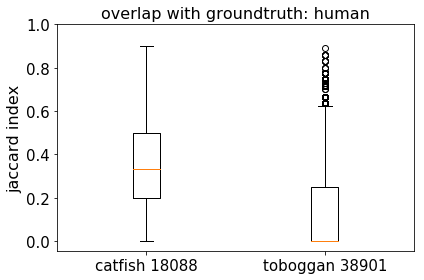

Done with plot alg-recall-


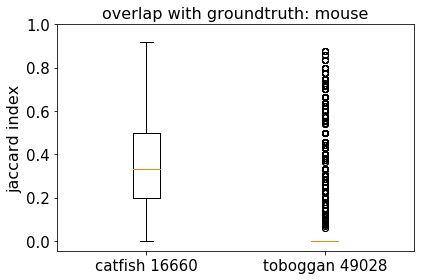

Done with plot alg-recall-


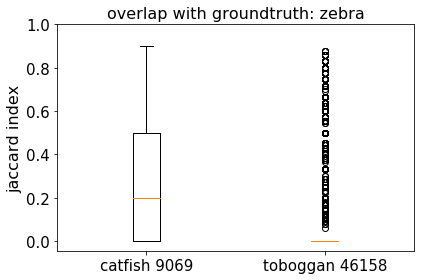

Done with plot alg-recall-


In [8]:
# Boxplots for ground truth recovery

import numpy
import matplotlib.pyplot as plt
import collections

figurename = 'alg-recall-'
alg_names = ['catfish', 'toboggan']
colors = ['red', 'blue']

show_flag = True

for idx, froot in enumerate(froots):
    
    this_catfish = data_catfish[froot]
    this_toboggan = data_toboggan[froot]
    num_nontrivial = num_nontrivials[idx]

    sizes_cat, recall_cat, jaccard_cat, keys_cat = zip(*this_catfish)
    sizes_tob, recall_tob, jaccard_tob, keys_tob = zip(*this_toboggan)

    plt.close()
    plt.clf()

    fig = plt.figure(1, figsize=(4, 3))
    ax = fig.add_subplot(111)
    ax.boxplot( [jaccard_cat, jaccard_tob] )

    plt.title('overlap with groundtruth: {}'.format(froot), fontsize=16)
    plt.ylabel('jaccard index', fontsize=16)
    ylims = plt.ylim()
    plt.ylim([ylims[0],1])
    ax.tick_params('y', labelsize=15)
    ax.set_xticklabels( [alg_names[0] + " {}".format(len(this_catfish)), alg_names[1] + " {}".format(len(this_toboggan))], fontsize=15 )
    fig.tight_layout()

    if show_flag:
        plt.show()
    else:
        plt.savefig( './figures/' + ''.join([figurename, froot, '.pdf']), format='pdf', dpi=300)
        plt.savefig( './figures/' + ''.join([figurename, froot, '.png']), format='png', dpi=300)
    plt.close()
    print("Done with plot {}".format(figurename))